#### <i> PODSUMOWANIE: 
    Zrealizowano rozwiązywanie L-V, trochę przekombinowana seria eksperymentów i tylko podstawowa wersja wykresu.

## Równania różniczkowe modelu Lotka-Volterra

In [1]:
using DataFrames
using DifferentialEquations
using Gadfly
using ParameterizedFunctions
using CSV

### 1. Program rozwiązujący równania różniczkowe modelu Lotka-Volterra:

In [2]:
# http://docs.juliadiffeq.org/latest/analysis/parameterized_functions.html
lv = @ode_def LotkaVolterra begin
  dx = a*x - b*x*y
  dy = -c*y + d*x*y
end a b c d

(::LotkaVolterra) (generic function with 9 methods)

#### - Zapisywanie do pliku *.csv

In [3]:
function solver(parameters :: Array{Float64}, ux :: Float64, uy :: Float64)
    n = 1
    u0 = [ux, uy] # initial conditions
    t = 10.0 # end of timespan
    tspan = (0.0, t)
#   lv = LotkaVolterra()
    prob = ODEProblem(lv, u0, tspan, parameters)
    sol = solve(prob, RK4(), dt=0.01)

    df :: DataFrame = DataFrame(t=sol.t, x=map(x->x[1],sol.u), y=map(x->x[2], sol.u), experiment=map(x -> string("exp",n), sol.u))
    CSV.write("output1.csv", df) # save dataframe as *.csv file
    df
end

solver (generic function with 1 method)

In [4]:
solver([1.0, 1.0, 1.0, 1.0], 3.0, 6.0)

,t,x,y,experiment
1,0.0,3.0,6.0,exp1
2,0.01,2.85201,6.11666,exp1
3,0.0252689,2.6343,6.28156,exp1
4,0.0441861,2.37964,6.46304,exp1
5,0.0681089,2.08313,6.65587,exp1
6,0.0962839,1.77166,6.83142,exp1
7,0.129325,1.45754,6.97053,exp1
8,0.167447,1.15877,7.05144,exp1
9,0.212244,0.883252,7.0561,exp1
10,0.267335,0.63411,6.96012,exp1


### 2. Seria eksperymentów dla różnych parametrów modelu L-V i analiza danych:

In [5]:
function printer_util(info :: String, column)
    println(info)
    println("Min: ", minimum(column))
    println("Max: ", maximum(column))
    println("Avg: ", mean(column))
end

function data_printer(i :: Int64, df :: DataFrame)
    println(">>EXP ", i)    
    printer_util("PREYS:", df[:x])
    printer_util("PREDATORS:",df[:y])
    print("\n")
end

data_printer (generic function with 1 method)

In [6]:
function nth_experiment(parameters :: Array{Float64}, ux :: Float64, uy :: Float64, n :: Int64)
  t = 10.0 # end of timespan
  lv = LotkaVolterra()
    u0 = [ux, uy]
    tspan = (0.0, t)
    prob = ODEProblem(lv, u0, tspan, parameters)
    sol = solve(prob, RK4(), dt=0.01)
    dftmp :: DataFrame = DataFrame(t=sol.t, x=map(x->x[1],sol.u), y=map(x->x[2], sol.u), experiment = map(x -> string("exp",n), sol.u))
    difference = DataFrame(difference=[dftmp[:2][x]-dftmp[:3][x] for x in 1:length(dftmp[:1])])
    dftmp = [dftmp difference]
    data_printer(n, dftmp)
    dftmp
end

nth_experiment (generic function with 1 method)

In [7]:
experiments = []
push!(experiments,nth_experiment([2/3, 4/3, 1., 1.], 2.0, 3.0,1))
push!(experiments,nth_experiment([2., 1., 1., 1.],2.0, 3.0,2))
push!(experiments,nth_experiment([1., 2., 1., 1.],2.0, 3.0,3))
push!(experiments,nth_experiment([1., 1., 2., 1.],2.0, 3.0,4))
push!(experiments,nth_experiment([1., 1., 1., 2.],2.0, 3.0,5))
push!(experiments,nth_experiment([2., 1., 2., 1.],2.0, 3.0,6))
concatenated_data = vcat(experiments...)
CSV.write("output2.csv", concatenated_data)
concatenated_data

>>EXP 1
PREYS:
Min: 0.03306047484872106
Max: 2.5253379419537527
Avg: 0.5897191299699331
PREDATORS:
Min: 0.004742899157507553
Max: 3.271885760553352
Avg: 1.23774556534371

>>EXP 2
PREYS:
Min: 0.3034906217799385
Max: 2.341628407080086
Avg: 1.0933197841913165
PREDATORS:
Min: 0.902372071647791
Max: 3.754871759871944
Avg: 2.411097561986936

>>EXP 3
PREYS:
Min: 0.011078771892761454
Max: 6.362464835044035
Avg: 1.4018112485206633
PREDATORS:
Min: 0.0056059366232233
Max: 3.181354669702058
Avg: 1.0914799709431642

>>EXP 4
PREYS:
Min: 0.6489494214149628
Max: 4.525277895263102
Avg: 2.033099769531334
PREDATORS:
Min: 0.17867837602342718
Max: 3.0
Avg: 1.3788484196021626

>>EXP 5
PREYS:
Min: 0.015388307551439323
Max: 2.5748507698991356
Avg: 0.7322319499791561
PREDATORS:
Min: 0.03088221297583307
Max: 5.149440339761815
Avg: 2.3276204763691

>>EXP 6
PREYS:
Min: 1.2522330877783379
Max: 2.9780885794913745
Avg: 1.9505750051694875
PREDATORS:
Min: 1.2523243187358397
Max: 3.0
Avg: 2.183343053166242



,t,x,y,experiment,difference
1,0.0,2.0,3.0,exp1,-1.0
2,0.01,1.93405,3.02915,exp1,-1.0951
3,0.0301579,1.80562,3.0827,exp1,-1.27707
4,0.0550917,1.65545,3.1393,exp1,-1.48385
5,0.0881993,1.47138,3.19825,exp1,-1.72688
6,0.127909,1.27376,3.24565,exp1,-1.97189
7,0.175919,1.06738,3.27189,exp1,-2.20451
8,0.232714,0.865307,3.26497,exp1,-2.39966
9,0.302279,0.671,3.21174,exp1,-2.54074
10,0.381445,0.506592,3.10778,exp1,-2.60119


### 3. Wykres

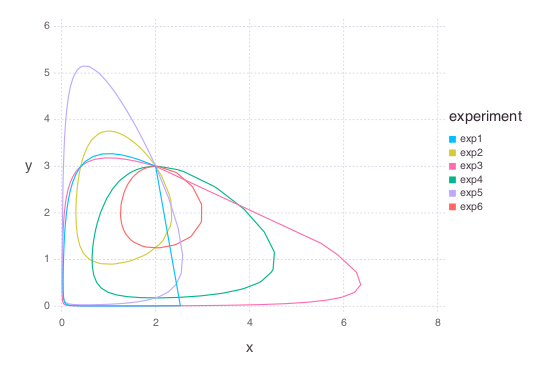

In [9]:
geom_plot = plot(concatenated_data, x="x", y="y", color = "experiment",Geom.polygon)